<a href="https://colab.research.google.com/github/dagobertomedeiros/curso_analise_series_temporais/blob/main/curso_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dados = '/content/gdrive/My Drive/temp/AirPassengers.csv'

## Previsão com Médias Móveis

In [5]:
data_parse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(dados, parse_dates=['Month'], index_col='Month', date_parser=data_parse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [10]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


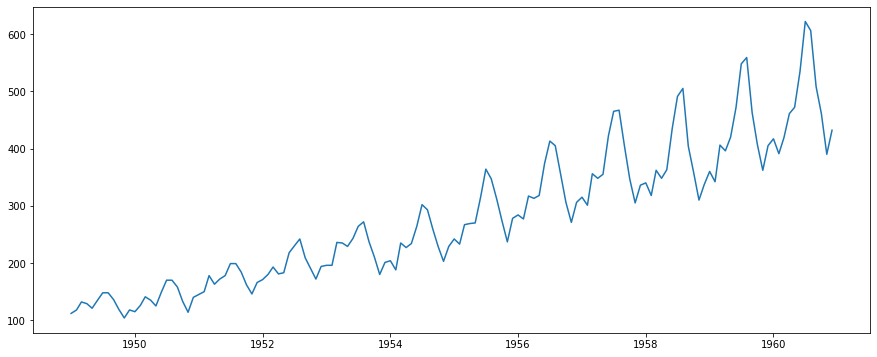

In [9]:
plt.plot(data)

In [12]:
optimal_n = None
best_mse = None

db = data[['#Passengers']].values.astype('float32')
mean_results_for_all_possible_n_value = np.zeros(int(len(db) / 2 - 2)) #np.zeros gera uma matriz de zeros

for n in range(3, int(len(db) / 2 + 1)):
  mean_for_n = np.zeros(len(db) - n)
  for i in range(0, len(db) - n):
    mean_for_n[i] = np.power(np.mean(db[:,0][i:i+n]) - db[i + n][0], 2) #[:,0] - siginifica [first_rows : end_rows, colunm 0]
  mean_results_for_all_possible_n_value[n-3] = np.mean(mean_for_n)

optimal_n = np.argmin(mean_results_for_all_possible_n_value) + 3
best_mse = np.min(mean_results_for_all_possible_n_value)

print('MSE = %s' % mean_results_for_all_possible_n_value)
print('Melhor MSE = %s' % best_mse)
print('Otimo n = %s' % optimal_n)

MSE = [ 2339.63356126  2764.88660714  3012.10128709  3151.45469085
  3227.18632274  3256.56100643  3186.6614532   3011.60186946
  2743.00652782  2472.34091928  2354.71361401  2403.15665424
  2555.64628844  2755.90582275  2957.73325883  3148.95678109
  3318.74202065  3471.20655414  3579.85735927  3632.1383133
  3621.28446048  3590.00382793  3614.46072399  3714.23057056
  3856.30383806  4039.07639445  4228.22951927  4417.98332931
  4590.62775569  4759.11651611  4915.97544876  5048.63704665
  5147.82094512  5226.01903743  5334.33177783  5486.37155691
  5665.83581156  5879.92290769  6108.05805477  6311.94563847
  6507.04778972  6685.18398409  6897.90877682  7105.06745207
  7299.11089319  7470.66004841  7664.68188379  7894.86749032
  8104.34268864  8337.10501668  8595.05628641  8844.55092457
  9063.90415815  9272.33339998  9544.40100932  9837.04023888
 10135.60331142 10420.20548681 10725.07181564 11069.94461765
 11393.32528446 11748.71711731 12111.18046458 12433.46474122
 12664.11747454 129

In [13]:
print('MA = %s' % np.mean(db[:, 0][len(db) - optimal_n : len(db)]))

MA = 427.66666


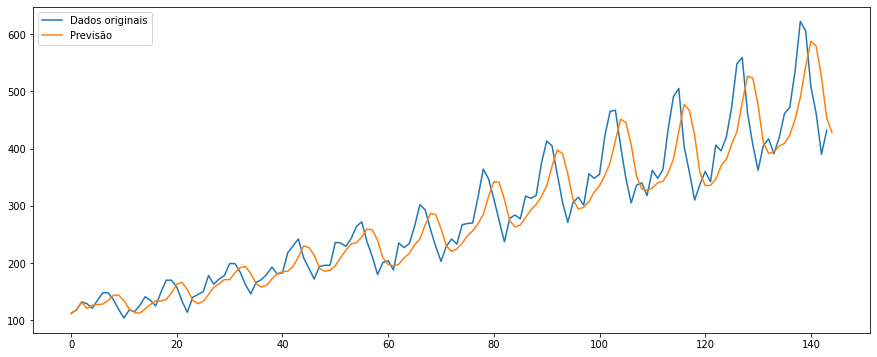

In [14]:
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
  forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
  forecast[i + optimal_n] = np.mean(db[:,0][i:i + optimal_n])

plt.plot(db[:,0], label='Dados originais')
plt.plot(forecast, label='Previsão')
plt.legend()
plt.show()

## Decomposição de series

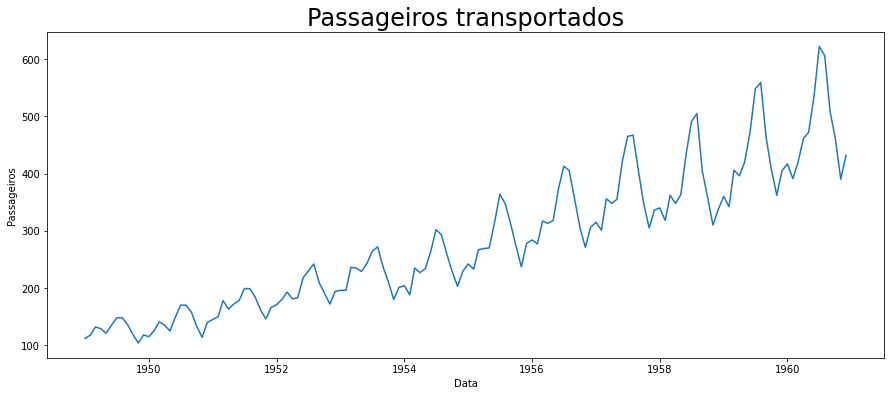

In [15]:
plt.plot(data)
plt.title('Passageiros transportados', fontsize=24)
plt.xlabel('Data')
plt.ylabel('Passageiros')
plt.show()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
result = seasonal_decompose(data, model='multiplicative')

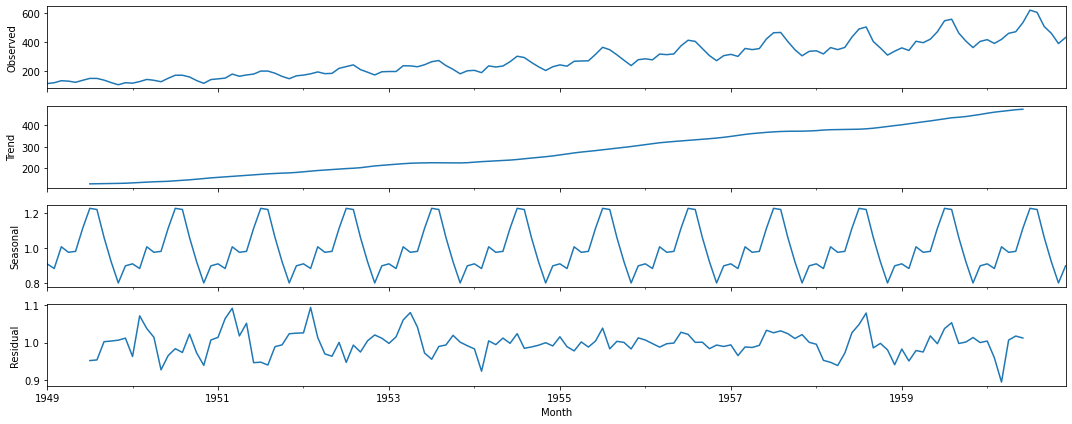

In [23]:
result.plot()
plt.show()

In [20]:
result2 = seasonal_decompose(data, model='aditive')

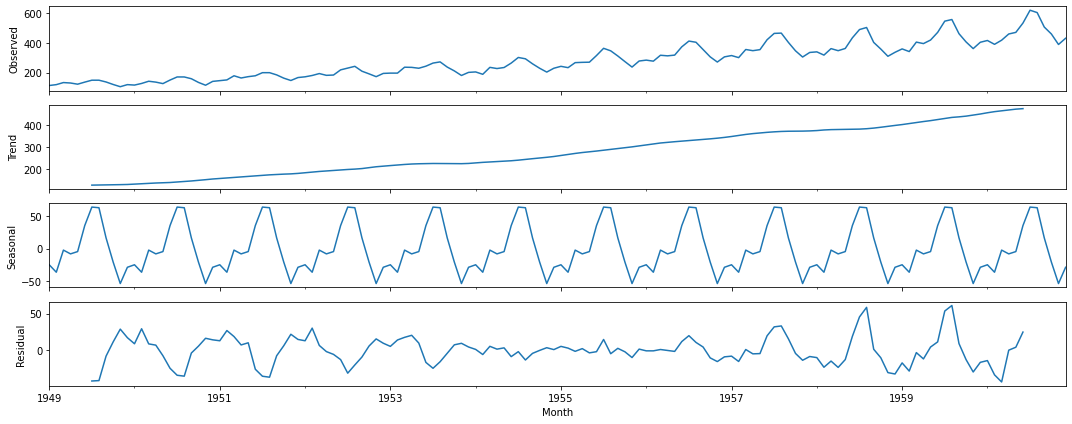

In [24]:
result2.plot()
plt.show()

## Teste de estacionariedade

In [25]:
from statsmodels.tsa.stattools import adfuller

In [44]:
X = data['#Passengers']
resultTest = adfuller(X) #valor de P maior de 0,05 então não é estácionaria
print(resultTest)
print('ADF Estatística: %f' % resultTest[0])
print('Valor de P: %f' % resultTest[1])
print('Valores Critícos:')
for key, value in resultTest[4].items():
  print("\t%s: %.3f" % (key, value))

(0.8153688792060418, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
ADF Estatística: 0.815369
Valor de P: 0.991880
Valores Critícos:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## Logs estacionariedade

In [45]:
d_log = np.log(data)

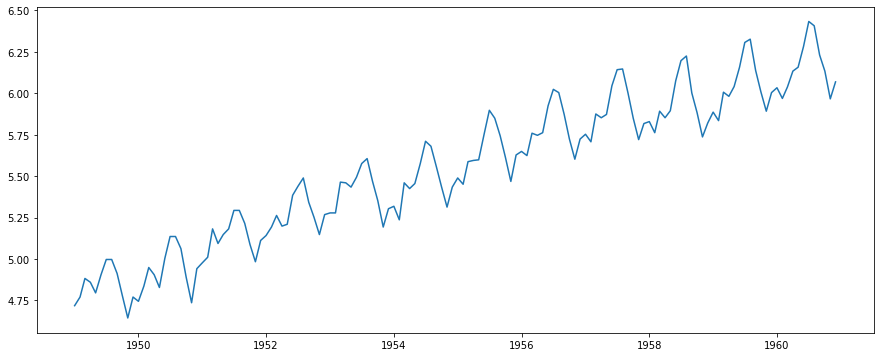

In [48]:
plt.plot(d_log) #técnica pode funcionar em alguns casos, neste apenas houve leve suavização

## Diferenciação
##### Técnicas mais robustas para tornar uma série estacionária